In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset in pandas
df = pd.read_csv("bajajelectricals.csv")
#Droping unwanted columns
df.drop(["Date", "Adj Close"], axis=1, inplace=True)
print("Shape ->",df.shape)
df.head()

Shape -> (4813, 5)


,Open,High,Low,Close,Volume
0,1.56,1.56,1.56,1.56,60.0
1,1.56,1.56,1.56,1.56,0.0
2,1.56,1.56,1.56,1.56,0.0
3,1.56,1.56,1.56,1.56,0.0
4,1.56,1.56,1.56,1.56,0.0


In [3]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df['Close_Tom'] =  df['Close']
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,1.56,1.56,1.56,60.0,1.56,1.56
1,1.56,1.56,1.56,0.0,1.56,1.56
2,1.56,1.56,1.56,0.0,1.56,1.56
3,1.56,1.56,1.56,0.0,1.56,1.56
4,1.56,1.56,1.56,0.0,1.56,1.56


In [4]:
#Shifting whole dataset down by one row so we can use yesterdays data to predict todays closing price
df['Close_Tom'] =  df['Close_Tom'].shift(-1)
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,1.56,1.56,1.56,60.0,1.56,1.56
1,1.56,1.56,1.56,0.0,1.56,1.56
2,1.56,1.56,1.56,0.0,1.56,1.56
3,1.56,1.56,1.56,0.0,1.56,1.56
4,1.56,1.56,1.56,0.0,1.56,1.56


In [5]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close', 'Close_Tom']]
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,1.56,1.56,1.56,60.0,1.56,1.56
1,1.56,1.56,1.56,0.0,1.56,1.56
2,1.56,1.56,1.56,0.0,1.56,1.56
3,1.56,1.56,1.56,0.0,1.56,1.56
4,1.56,1.56,1.56,0.0,1.56,1.56


In [6]:
#Filling null values using pad values, will fill next rows values to empty cells
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Open         0
High         0
Low          0
Volume       0
Close        0
Close_Tom    0
dtype: int64

<AxesSubplot:>

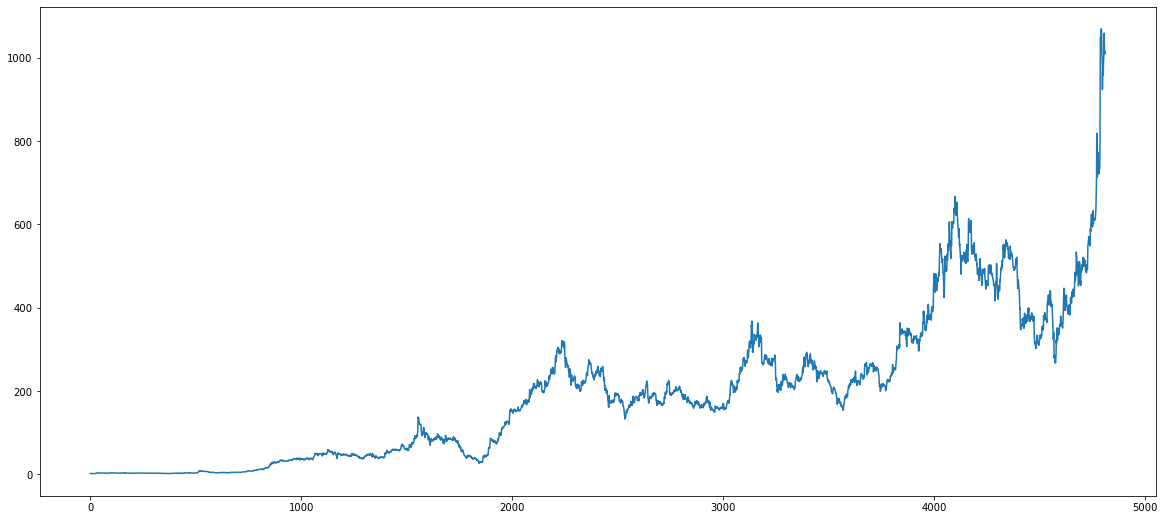

In [7]:
#Dataset Plotted
df['Close'].plot(figsize=(20,9))

In [8]:
#columns for x and y
x  = df[['Open','High','Low','Volume', 'Close']]
y = df['Close_Tom']

In [9]:
#Normalising data
scaler = MinMaxScaler()
df[['Open','High','Low','Volume', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Volume', 'Close']])
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,0.0,0.0,0.0,0.000008,0.0,1.56
1,0.0,0.0,0.0,0.000000,0.0,1.56
2,0.0,0.0,0.0,0.000000,0.0,1.56
3,0.0,0.0,0.0,0.000000,0.0,1.56
4,0.0,0.0,0.0,0.000000,0.0,1.56


In [10]:
#Splitting data
x_train , x_test , y_train , y_test = train_test_split(x ,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3461, 5)
(1154, 5)
(3461,)
(1154,)


---
# Random Forest

In [11]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
model_rf.fit(x_train, y_train)   

RandomForestRegressor(random_state=0)

In [12]:
#predicting stock price using our model
preds_rf = model_rf.predict(x_test)

dfpred_rf = pd.DataFrame({'Actual':y_test,'Predicted':preds_rf, 'Difference':abs(y_test-preds_rf)})
dfpred_rf.head(10)

,Actual,Predicted,Difference
2879,169.166611,169.895367,0.728756
161,3.205775,3.021740,0.184035
1755,63.413086,70.111848,6.698762
1615,85.851563,82.135752,3.715811
4678,479.500000,498.313097,18.813097
3359,224.335999,227.771518,3.435519
4800,961.950012,991.550007,29.599995
2944,161.020462,156.911002,4.109460
3386,265.652069,262.268234,3.383835
4445,398.819550,388.142700,10.676850


In [13]:
#Different Metrics calculated using our model
print("Score:", model_rf.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_rf))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_rf))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_rf))**0.5)
print('Loss:', abs(y_test-preds_rf).mean())

Score: 0.9968776049266551
Mean Absolute Error: 4.590576995867728
Mean Squared  Error: 89.25051317150854
Root Mean Squared Error: 9.447248973722909
Loss: 4.590576995867728


---
# k-NN

In [14]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=7)
model_knn.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [15]:
#predicting stock price using our model
preds_knn = model_knn.predict(x_test)

dfpred_knn = pd.DataFrame({'Actual':y_test,'Predicted':preds_knn, 'Difference':abs(y_test-preds_knn)})
dfpred_knn.head(10)

,Actual,Predicted,Difference
2879,169.166611,169.475540,0.308929
161,3.205775,12.880987,9.675212
1755,63.413086,59.999186,3.413900
1615,85.851563,55.702705,30.148858
4678,479.500000,541.352651,61.852651
3359,224.335999,227.636724,3.300725
4800,961.950012,922.683329,39.266683
2944,161.020462,160.792824,0.227638
3386,265.652069,79.901140,185.750929
4445,398.819550,336.989675,61.829875


In [16]:
model_knn.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [17]:
#Different Metrics calculated using our model
print("Score:", model_knn.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_knn))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_knn))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_knn))**0.5)
print('Loss:', abs(y_test-preds_knn).mean())

Score: 0.7678905929972728
Mean Absolute Error: 38.91787929116118
Mean Squared  Error: 6634.613237695045
Root Mean Squared Error: 81.4531352232377
Loss: 38.91787929116118


---
# Decision Tree

In [18]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [19]:
#predicting stock price using our model
preds_dt = model_dt.predict(x_test)

dfpred_dt = pd.DataFrame({'Actual':y_test,'Predicted':preds_dt, 'Difference':abs(y_test-preds_dt)})
dfpred_dt.head(10)

,Actual,Predicted,Difference
2879,169.166611,171.703125,2.536514
161,3.205775,2.583351,0.622424
1755,63.413086,66.613007,3.199921
1615,85.851563,89.753906,3.902343
4678,479.500000,492.914795,13.414795
3359,224.335999,228.335892,3.999893
4800,961.950012,989.150024,27.200012
2944,161.020462,157.703476,3.316986
3386,265.652069,256.822998,8.829071
4445,398.819550,379.746826,19.072724


In [20]:
#Different Metrics calculated using our model
print("Score:", model_dt.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_dt))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_dt))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_dt))**0.5)
print('Loss:', abs(y_test-preds_dt).mean())

Score: 0.9956721351440584
Mean Absolute Error: 5.846831736676775
Mean Squared  Error: 123.70765077973788
Root Mean Squared Error: 11.122394111868985
Loss: 5.846831736676775


---
# Linear Regression

In [21]:
#linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [22]:
#Coefficients and Intercept of LR
print(model_lr.coef_)
print(model_lr.intercept_)

[ 6.57629138e-02 -2.17878891e-01 -1.07433113e-01  1.42498079e-08
  1.26305530e+00]
-0.001619441662370491


In [23]:
#predicting stock price using our model
preds_lr = model_lr.predict(x_test)

dfpred_lr = pd.DataFrame({'Actual':y_test,'Predicted':preds_lr, 'Difference':abs(y_test-preds_lr)})
dfpred_lr.head(10)

,Actual,Predicted,Difference
2879,169.166611,168.098858,1.067753
161,3.205775,3.223238,0.017463
1755,63.413086,66.828837,3.415751
1615,85.851563,83.347412,2.504151
4678,479.500000,495.020094,15.520094
3359,224.335999,229.725827,5.389828
4800,961.950012,967.047436,5.097424
2944,161.020462,158.092736,2.927726
3386,265.652069,263.692523,1.959546
4445,398.819550,392.511593,6.307957


In [24]:
#Different Metrics calculated using our model
print("Score:", model_lr.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_lr))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_lr))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_lr))**0.5)
print('Loss:', abs(y_test-preds_lr).mean())

Score: 0.9974198752934249
Mean Absolute Error: 3.9011095022556472
Mean Squared  Error: 73.75026180195324
Root Mean Squared Error: 8.587797261344335
Loss: 3.9011095022556472
